Student Name : Alish shakya

University ID : 2408638

Dataset Source: Accident Data. The dataset was created by Himel Sardar in 2024.
The dataset can be accessed through the following Kaggle link: https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset

About Dataset

This dataset contains detailed records of simulated road accident data, focusing on factors influencing survival outcomes. The dataset includes demographic, behavioral, and situational attributes, providing valuable insights into how various factors impact the survival probability during road accidents.

This dataset aligns with UNSDG Goal 3: Good Health and Well-being.

The classification model supports this Goal by:

- Identifying key factors influencing accident survival.
- Providing insights for developing targeted safety interventions.
- Improving road safety measures and policies.
- Reducing fatalities and injuries from accidents.

Key features:

- Age
- Gender
- Speed of Impact
- Helmet Used
- Seatbelt Used
- Survived (Target Variable)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score

In [20]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept_and_Technology_of_Ai/Coursework/Classification/accident.csv')

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # or strategy='mean' for numerical columns
df[:] = imputer.fit_transform(df)

# Display initial info
print("Initial Dataset Info:")
print(df.info())
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
None
   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [22]:
# Split Data into Features and Target, Then Train-Test Split
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

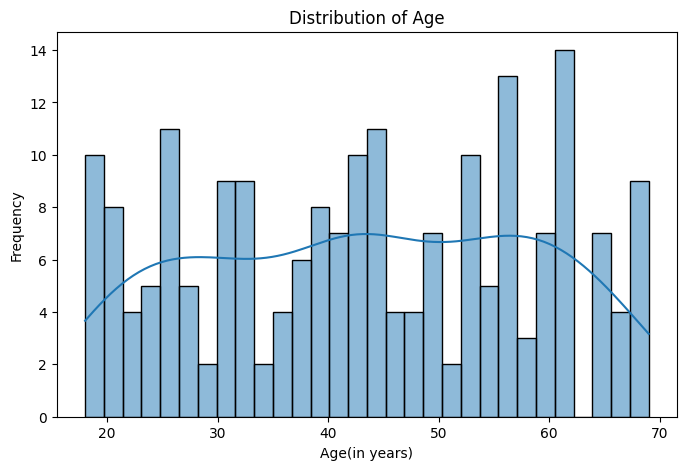

In [23]:
# Visualization: Temperature Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age(in years)')
plt.ylabel('Frequency')
plt.show()

- The histogram reveals the distribution of ages in the accident dataset.
- A normal distribution would suggest a balanced representation of ages involved in accidents, while skewness indicates a higher prevalence of certain age groups.
- Multiple peaks in the distribution may indicate different age groups that are more prone to accidents.


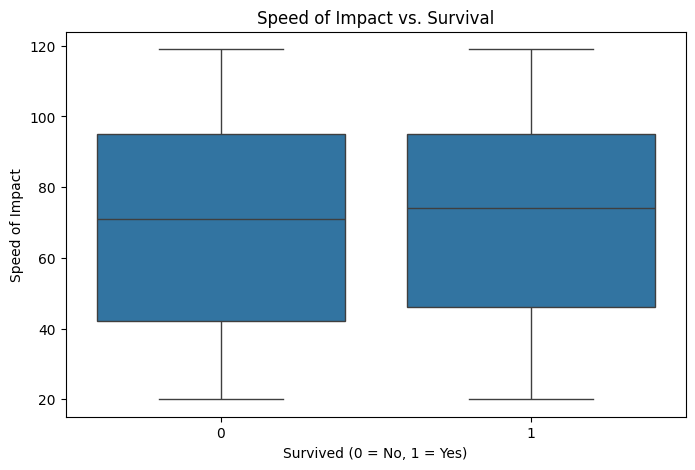

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Survived'], y=df['Speed_of_Impact'])
plt.title('Speed of Impact vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Speed of Impact')
plt.show()

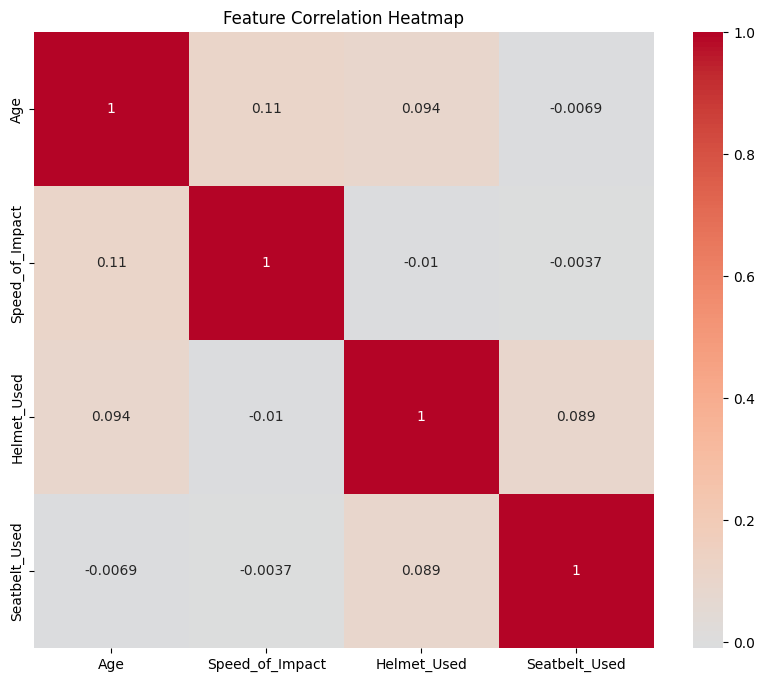

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
features = ['Age', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']

df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()
# Insight: The heatmap reveals the pairwise correlations between variables.

## Logistic Regression from scratch.


In [26]:
# Define features and target variable
X = df.drop(columns=['Survived', 'Gender']).values
y = df['Survived'].values

# Split data into training and testing (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize weights and bias
w = np.zeros(X_train.shape[1])  # Initialize weights to zeros
b = 0.0                         # Initialize bias to zero

# Set hyperparameters
alpha = 0.001  # Learning rate
n_iter = 2000   # Number of iterations

# Define functions
def logistic_function(x):
    y = 1 / (1 + np.exp(-x))
    return y

def log_loss(y_true, y_pred):

    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def cost_function(y_true, y_pred):

    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss_vec = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
    cost = np.sum(loss_vec) / n
    return cost

def costfunction_logreg(X, y, w, b):

    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost

def compute_gradient(X, y, w, b):

    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(y_pred - y) / n  # Gradient w.r.t bias, scalar

    return grad_w, grad_b


print("\nTraining Logistic Regression Model:")
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):

    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

def prediction(X, w, b, threshold=0.5):

    # Compute the predicted probabilities using the logistic function
    z = np.dot(X, w) + b
    y_test_prob = 1 / (1 + np.exp(-z))

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score


# Train the logistic regression model using gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X_train, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Make predictions on the test set
y_pred = prediction(X_test, w_out, b_out, threshold=0.5)

# Evaluate the model
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_pred)


Training Logistic Regression Model:
Iteration 0: Cost = 0.693094
Iteration 100: Cost = 0.692844
Iteration 200: Cost = 0.692825
Iteration 300: Cost = 0.692806
Iteration 400: Cost = 0.692787
Iteration 500: Cost = 0.692769
Iteration 600: Cost = 0.692751
Iteration 700: Cost = 0.692733
Iteration 800: Cost = 0.692715
Iteration 900: Cost = 0.692697
Iteration 1000: Cost = 0.692680
Iteration 1100: Cost = 0.692662
Iteration 1200: Cost = 0.692645
Iteration 1300: Cost = 0.692628
Iteration 1400: Cost = 0.692612
Iteration 1500: Cost = 0.692595
Iteration 1600: Cost = 0.692579
Iteration 1700: Cost = 0.692562
Iteration 1800: Cost = 0.692546
Iteration 1900: Cost = 0.692531
Iteration 1999: Cost = 0.692515


In [32]:
# Split Data into Features and Target, Then Train-Test Split
X = df.drop(columns=['Survived'])
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
y = df['Survived'].values

X = X.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Now you can standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 100

# Train model using the gradient_descent function
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)



Training Logistic Regression Model:
Iteration 0: Cost = 0.692205
Iteration 99: Cost = 0.671594


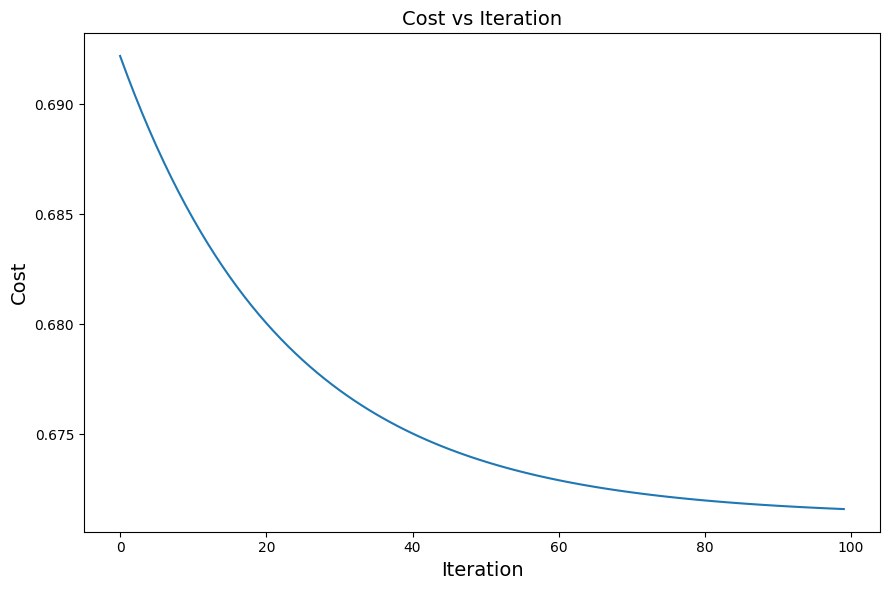

In [33]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.6716
Test Loss (Cost): 0.6866


In [35]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 52.50%

Confusion Matrix:
[[14  6]
 [13  7]]
Precision: 0.54
Recall: 0.35
F1-Score: 0.42


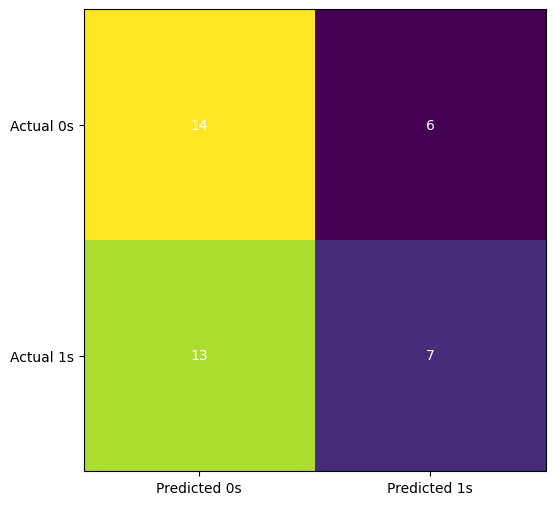

In [36]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

## 3.Logistic Regression from Scikit Learn



In [40]:
import sklearn
# OR import the specific function if that's all you need
from sklearn.metrics import f1_score
# Display the first few rows to understand the data structure
print(df.head())

# Check if 'Gender' column exists before dropping
if 'Gender' in df.columns:
    df = df.drop(columns=['Gender'])

# Define features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Use sklearn's f1_score function directly, avoid assigning to 'f1_score'
f1 = sklearn.metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


   Age  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0   56             27.0            0              0         1
1   69             46.0            0              1         1
2   46             46.0            1              1         0
3   32            117.0            0              1         0
4   60             40.0            1              1         0
Accuracy: 0.57
Recall: 0.61
F1 Score: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.52      0.61      0.56        18

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40



## Random Forest Classifier Using Scikit Learn

Confusion Matrix:
 [[11 11]
 [ 7 11]]
Precision: 0.5000
Recall: 0.6111
F1-score: 0.5500
Accuracy: 0.5500


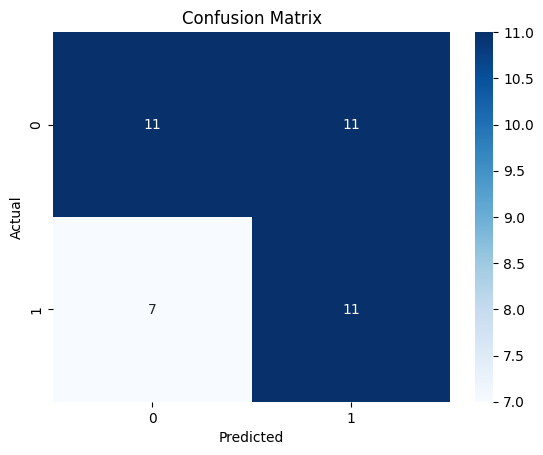

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42) # Use RandomForestClassifier
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4.Hyper-parameter Optimization with Cross-Validation


In [43]:
from sklearn.model_selection import GridSearchCV

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# HYPERPARAMETER TUNING WITH GRIDSEARCH

# 1. Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42),
                              param_grid_lr,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# 2. Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# MODEL EVALUATION WITH BEST HYPERPARAMETERS
y_pred_lr = best_lr_model.predict(X_test_scaled)
print("\nLogistic Regression Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

y_pred_rf = best_rf_model.predict(X_test_scaled)
print("\nRandom Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Logistic Regression Performance:
Confusion Matrix:
 [[22  0]
 [18  0]]
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Accuracy: 0.5500

Random Forest Performance:
Confusion Matrix:
 [[10 12]
 [ 5 13]]
Precision: 0.5200
Recall: 0.7222
F1-score: 0.6047
Accuracy: 0.5750


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##5. Feature Selection


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load and preprocess data
df['Survived'] = df['Survived']
X = df[['Age','Speed_of_Impact','Helmet_Used','Seatbelt_Used']]
y = df['Survived']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SelectFromModel with Logistic Regression (L1 Regularization)
#    L1 regularization (Lasso) can drive coefficients of unimportant features to zero.
#    SelectFromModel selects features whose coefficients are non-zero.

# Train a Logistic Regression model with L1 penalty
logistic = LogisticRegression(penalty="l1", solver='liblinear', random_state=42)
logistic.fit(X_train_scaled, y_train)

# Select features based on non-zero coefficients
sfm = SelectFromModel(logistic, prefit=True) # 'prefit=True' assumes the model is already fitted
X_train_selected_lr = sfm.transform(X_train_scaled)
X_test_selected_lr = sfm.transform(X_test_scaled)

# Print the selected features
selected_features_lr = X.columns[sfm.get_support()] #Get names of selected features
print("Selected Features (Logistic Regression with L1):", selected_features_lr)

# 2. SelectFromModel with RandomForestClassifier (Feature Importance)
#    RandomForestClassifier provides feature importances based on how much each feature
#    contributes to reducing impurity (e.g., Gini impurity or entropy).

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Example parameters
rf.fit(X_train_scaled, y_train)

# Select features based on feature importance
sfm_rf = SelectFromModel(rf, threshold="mean", prefit=True) # Select features with importance above the mean
X_train_selected_rf = sfm_rf.transform(X_train_scaled)
X_test_selected_rf = sfm_rf.transform(X_test_scaled)

# Print the selected features
selected_features_rf = X.columns[sfm_rf.get_support()] #Get names of selected features
print("Selected Features (Random Forest):", selected_features_rf)

# 1. Logistic Regression with Selected Features

# Train a Logistic Regression model using only the selected features
model_lr_selected = LogisticRegression(random_state=42)
model_lr_selected.fit(X_train_selected_lr, y_train)

# Make predictions on the test set
y_pred_lr_selected = model_lr_selected.predict(X_test_selected_lr)

# Evaluate the model
print("\nLogistic Regression Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_selected))
print(f"Precision: {precision_score(y_test, y_pred_lr_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_selected):.4f}")

# 2. Random Forest with Selected Features

# Train a Random Forest model using only the selected features
model_rf_selected = RandomForestClassifier(random_state=42)
model_rf_selected.fit(X_train_selected_rf, y_train)

# Make predictions on the test set
y_pred_rf_selected = model_rf_selected.predict(X_test_selected_rf)

# Evaluate the model
print("\nRandom Forest Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_selected))
print(f"Precision: {precision_score(y_test, y_pred_rf_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_selected):.4f}")


Selected Features (Logistic Regression with L1): Index(['Age', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used'], dtype='object')
Selected Features (Random Forest): Index(['Age', 'Speed_of_Impact'], dtype='object')

Logistic Regression Performance with Selected Features:
Confusion Matrix:
 [[12 10]
 [ 7 11]]
Precision: 0.5238
Recall: 0.6111
F1-score: 0.5641
Accuracy: 0.5750

Random Forest Performance with Selected Features:
Confusion Matrix:
 [[11 11]
 [10  8]]
Precision: 0.4211
Recall: 0.4444
F1-score: 0.4324
Accuracy: 0.4750
